# DMFT+DFT+analytic continuation for $Sr_2RuO_4$ self-energy: solution to exercise

In [1]:
import OmegaMaxEnt_TRIQS as OT
from pytriqs.gf import *
import numpy as np
from pytriqs.plot.mpl_interface import oplot,plt  #to plot the result
from pytriqs.archive import HDFArchive as HA  #to load the data from a hdf5 file
import os
import shutil as su

First we create a working directory:

In [3]:
output_dir="ouput_MaxEnt"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
os.chdir(output_dir)

Then we load the self-energy:

In [4]:
beta=50
with HA("../Sr2RuO4/Sr2RuO4_b50_w90.h5", 'r') as A:
    S=A['DMFT_results']['Sigma_iw']

We compute the artificial Green's function with *S['down_1']* and perform the analytic continuation, using the same parameters as for the *'down_0'* component:

In [5]:
mu=5.0
G=GfImFreq(indices=[0], mesh=S['down_1'].mesh)
G<<inverse(iOmega_n+mu-S['down_1'])

Green Function  with mesh Matsubara Freq Mesh of size 2050, Domain: Matsubara domain with beta = 50, statistic = Fermion, positive_only : 0 and target_rank 2: 

In [6]:
GR=OT.compute_GfReFreq(G, comp_grid_params=[0.01, 10], non_uniform_grid=True, interactive_mode=False)

/Users/dom2/TRIQS/install/lib/python2.7/site-packages/pytriqs/gf/gf.py:328: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dat = self._data[ self._rank * [slice(0,None)] + key_lst ]


continuation done


Now, we obtain the retarded self-energy as $\Sigma^R(\omega)=\omega+\mu-1/G^R(\omega)$ and plot the result:

In [7]:
S_mu5_down_1=GfReFreq(indices=[0],mesh=GR.mesh,name="$S_{\downarrow 1, \mu5}$")
S_mu5_down_1<<Omega+mu-inverse(GR)

Green Function $S_{\downarrow 1, \mu5}$ with mesh Linear Mesh of size 65537 and target_rank 2: 

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


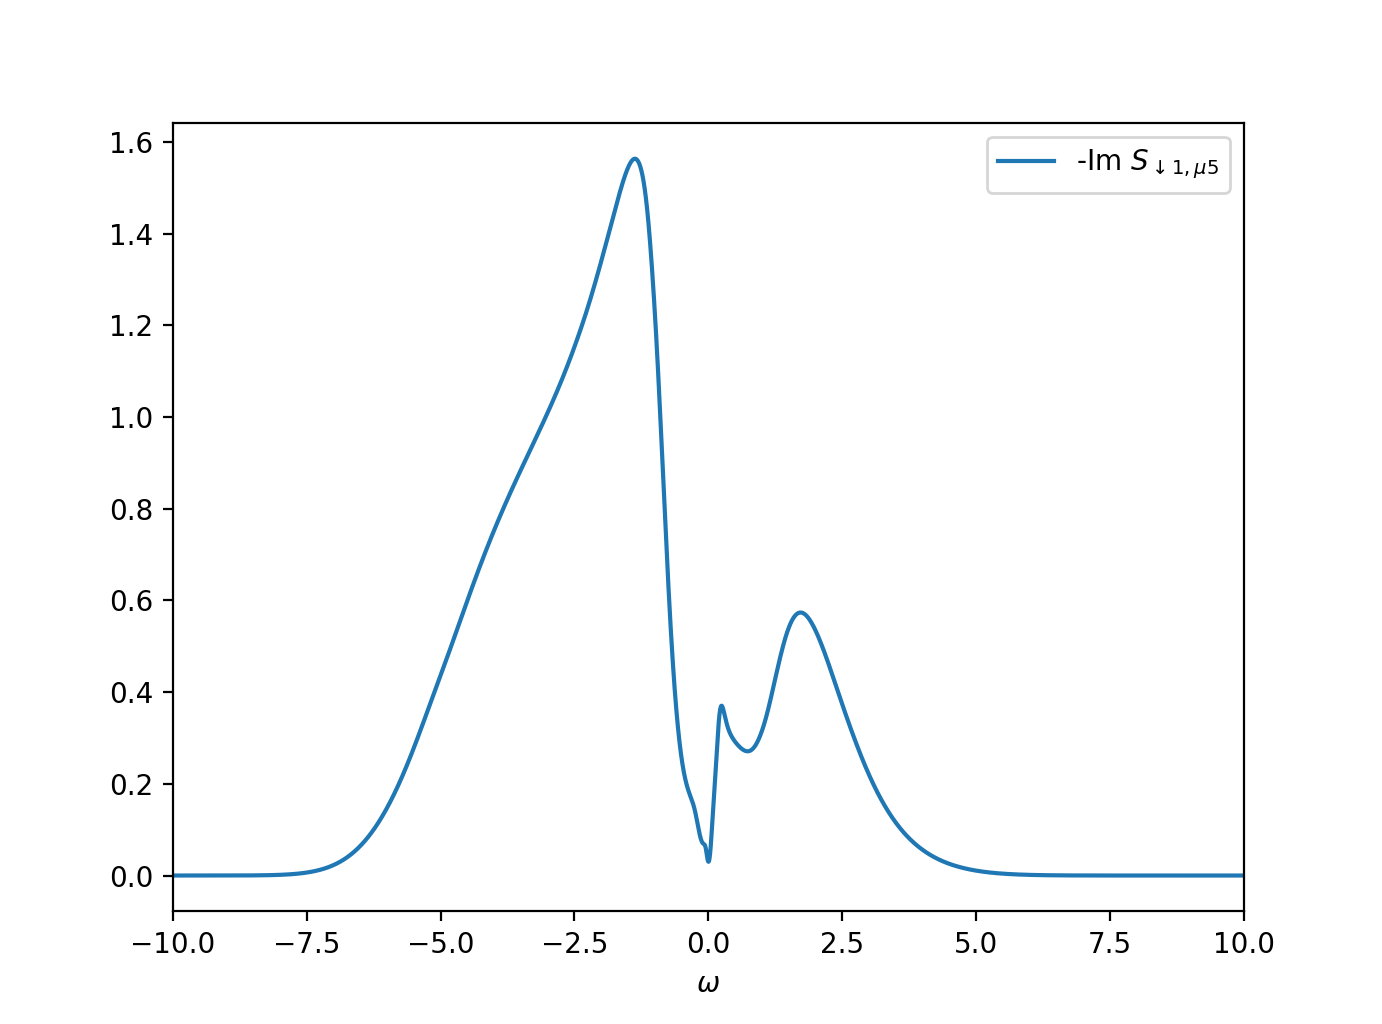

<IPython.core.display.Javascript object>


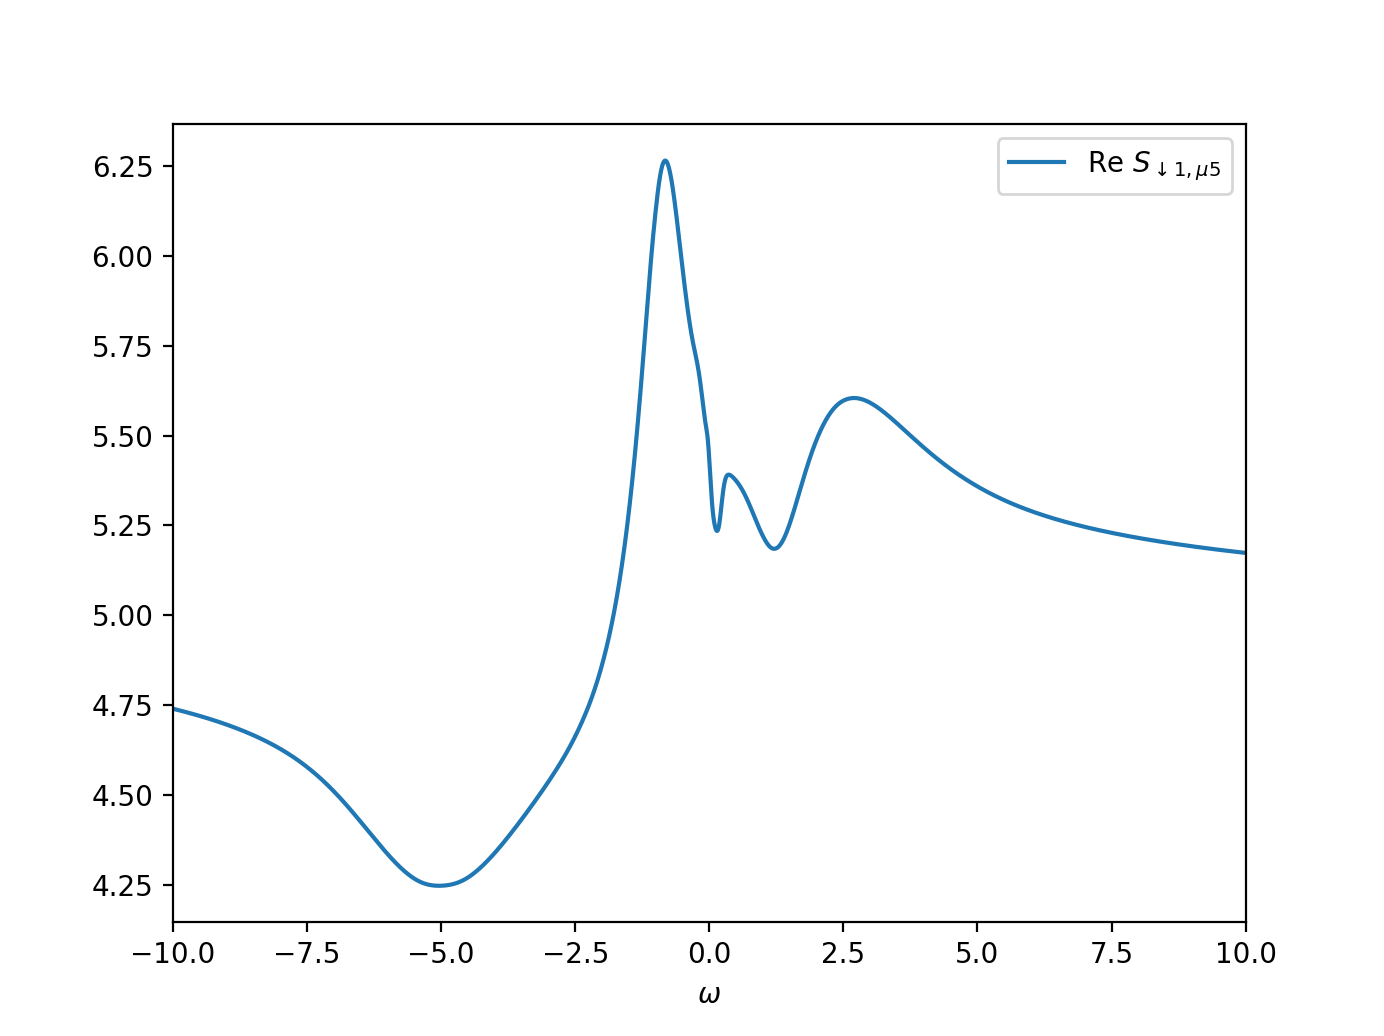

Text(0,0.5,'')

In [10]:
plt.figure(1)
oplot(-S_mu5_down_1.imag,label="-Im $S_{\downarrow 1, \mu5}$")
plt.xlim([-10,10])
plt.ylabel('')
plt.figure(2)
oplot(S_mu5_down_1.real, label="Re $S_{\downarrow 1, \mu5}$")
plt.xlim([-10,10])
plt.ylabel('')

Now, let us see if the result changes with $\mu$:

In [11]:
mu_vals=np.linspace(3,7,num=5)
list_G=[]
list_names=[]
for mu in mu_vals:
    G=GfImFreq(indices=[0], mesh=S['down_1'].mesh)
    G<<inverse(iOmega_n+mu-S['down_1'])
    list_G.append(G)
    list_names.append("mu"+str(mu))

Gmu=BlockGf(name_list=list_names,block_list = list_G)

In [12]:
GR=OT.compute_GfReFreq(Gmu, comp_grid_params=[0.01, 10], non_uniform_grid=True, interactive_mode=False)

continuation done
continuation done
continuation done
continuation done
continuation done
continuation done


Now we get $\Sigma^R(\omega)$ for each value of $\mu$ and put the result in a *BlockGf* object:

In [13]:
list_SR=[]
ind_mu=0
for bl,Gbl in GR:
    mu=mu_vals[ind_mu]
    ind_mu=ind_mu+1
    Stmp=GfReFreq(indices=[0], mesh=Gbl.mesh)
    Stmp<<Omega+mu-inverse(Gbl)
    list_SR.append(Stmp)
S_down_1=BlockGf(name_list=list_names, block_list=list_SR, name ="$S_^R{\downarrow 1}$")

and we plot the results for all values of $\mu$:

<IPython.core.display.Javascript object>


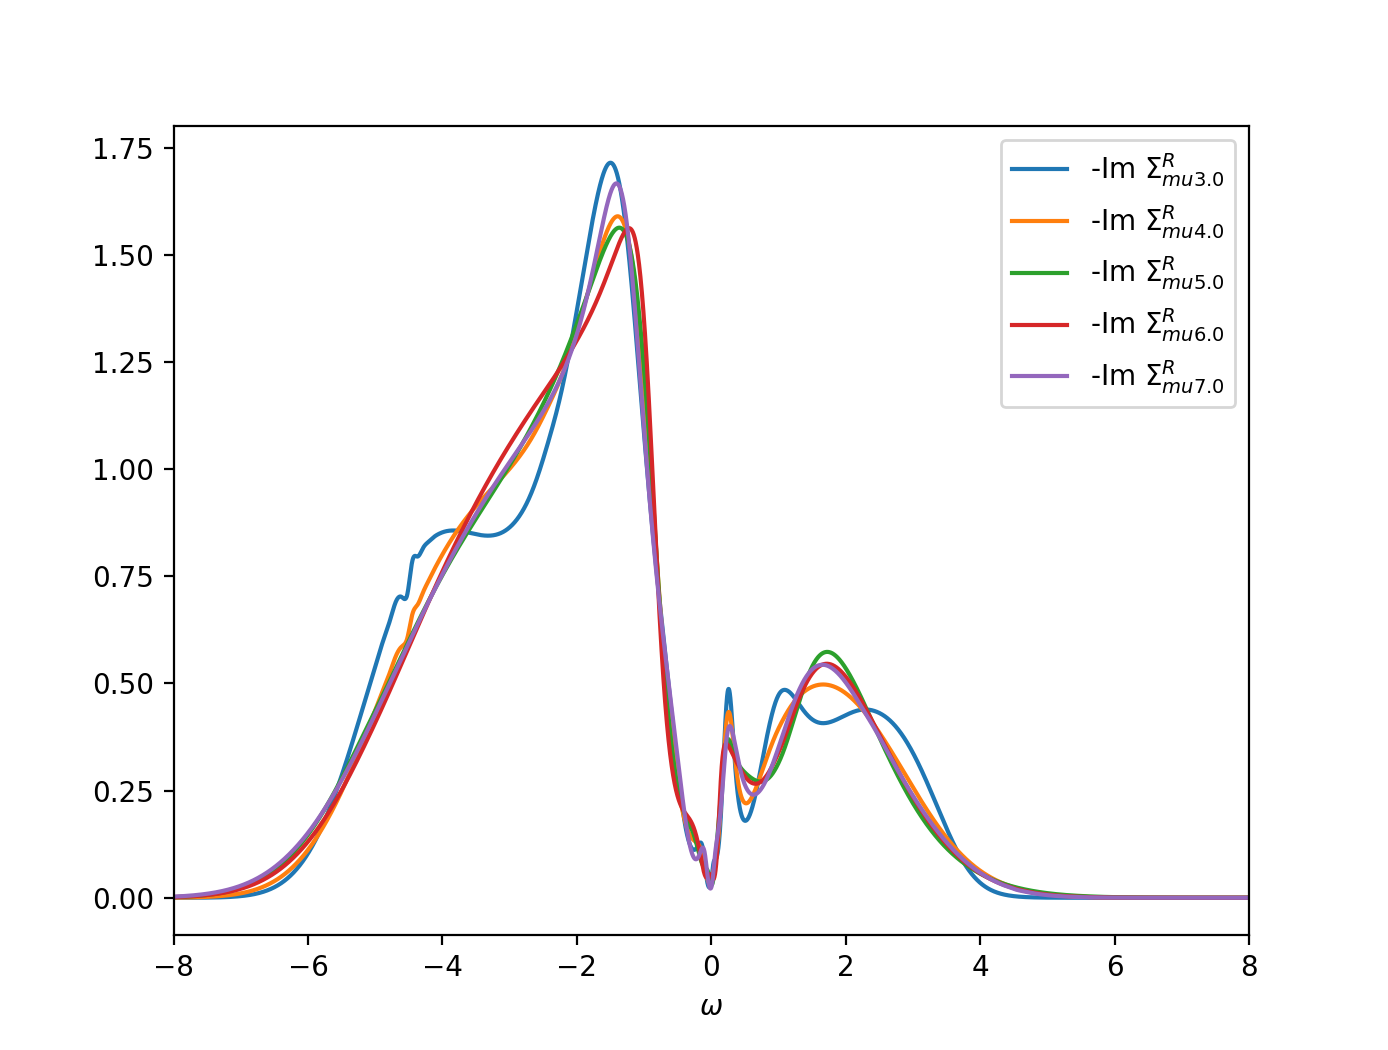

<IPython.core.display.Javascript object>


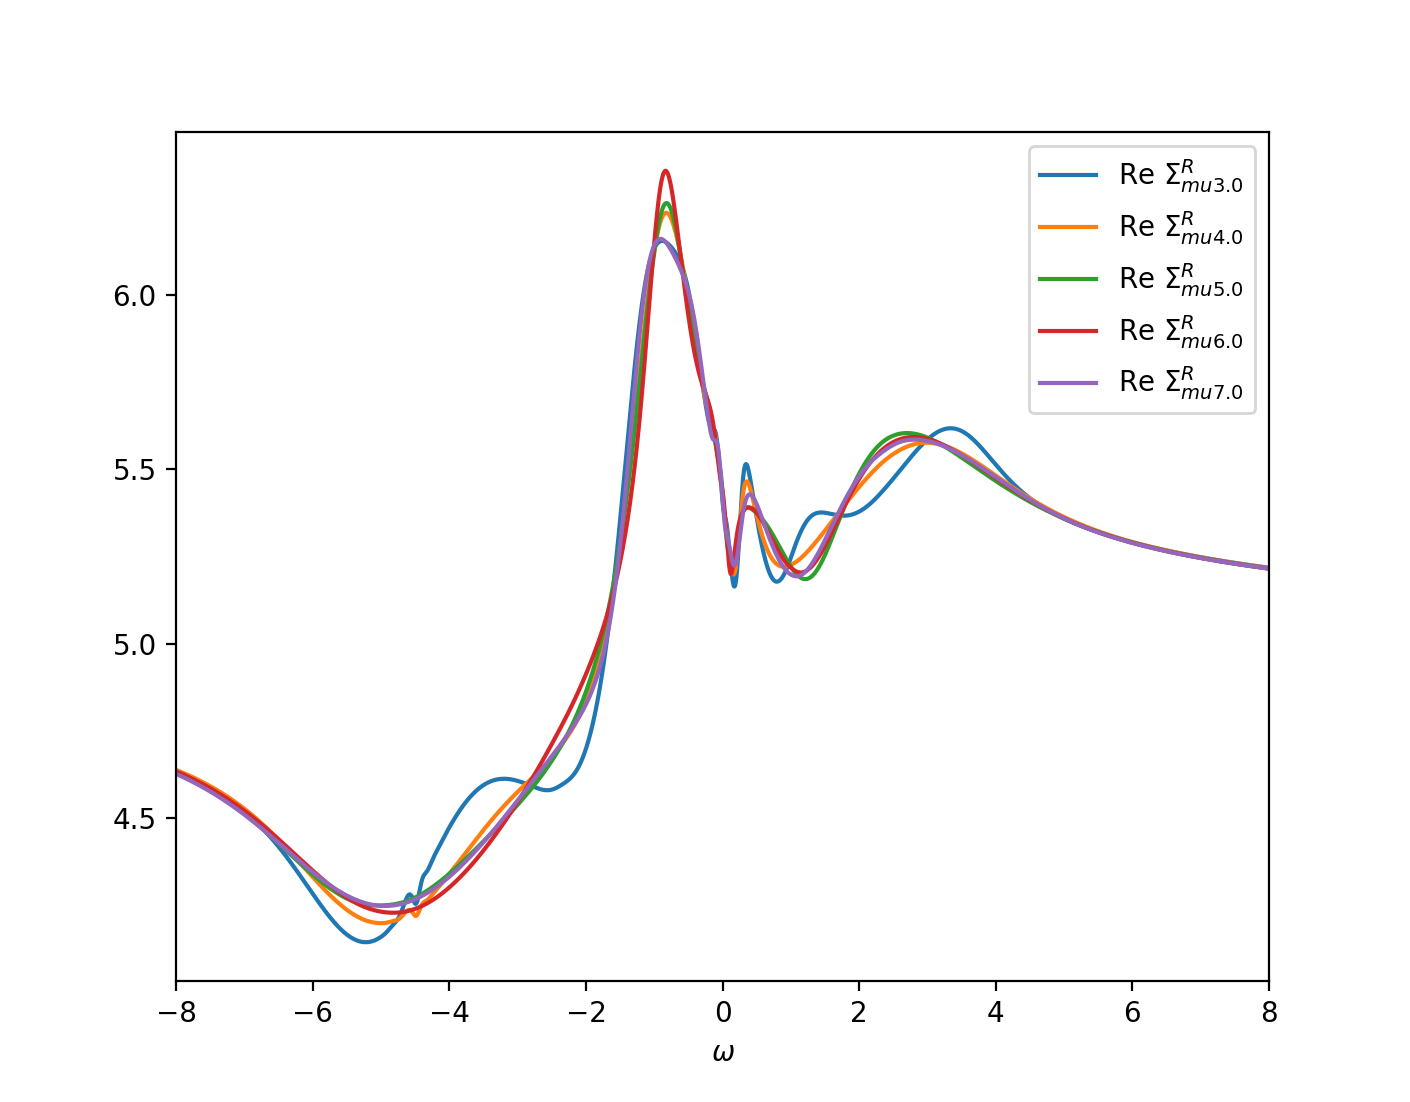

Text(0,0.5,'')

In [14]:
plt.figure(3)
for ind in list_names:
    lbl="-Im $\Sigma^R_{"+ind+"}$"
    oplot(-S_down_1[ind].imag,label=lbl)
plt.xlim([-8,8])
plt.legend()
plt.ylabel('')
plt.figure(4)
for ind in list_names:
    lbl="Re $\Sigma^R_{"+ind+"}$"
    oplot(S_down_1[ind].real,label=lbl)
plt.xlim([-8,8])
plt.legend()
plt.ylabel('')

We see that the self-energy is relatively stable between $\mu=5$ to $\mu=7$.

Now, let us recompute the *down_0* component and compare with *down_1*:

In [15]:
mu=5.0
G=GfImFreq(indices=[0], mesh=S['down_0'].mesh)
G<<inverse(iOmega_n+mu-S['down_0'])
GR=OT.compute_GfReFreq(G, comp_grid_params=[0.01, 10], non_uniform_grid=True, interactive_mode=False)
S_mu5_down_0=GfReFreq(indices=[0],mesh=GR.mesh,name="$S_{\downarrow 0, \mu5}$")
S_mu5_down_0<<Omega+mu-inverse(GR)

continuation done


Green Function $S_{\downarrow 0, \mu5}$ with mesh Linear Mesh of size 65537 and target_rank 2: 

<IPython.core.display.Javascript object>


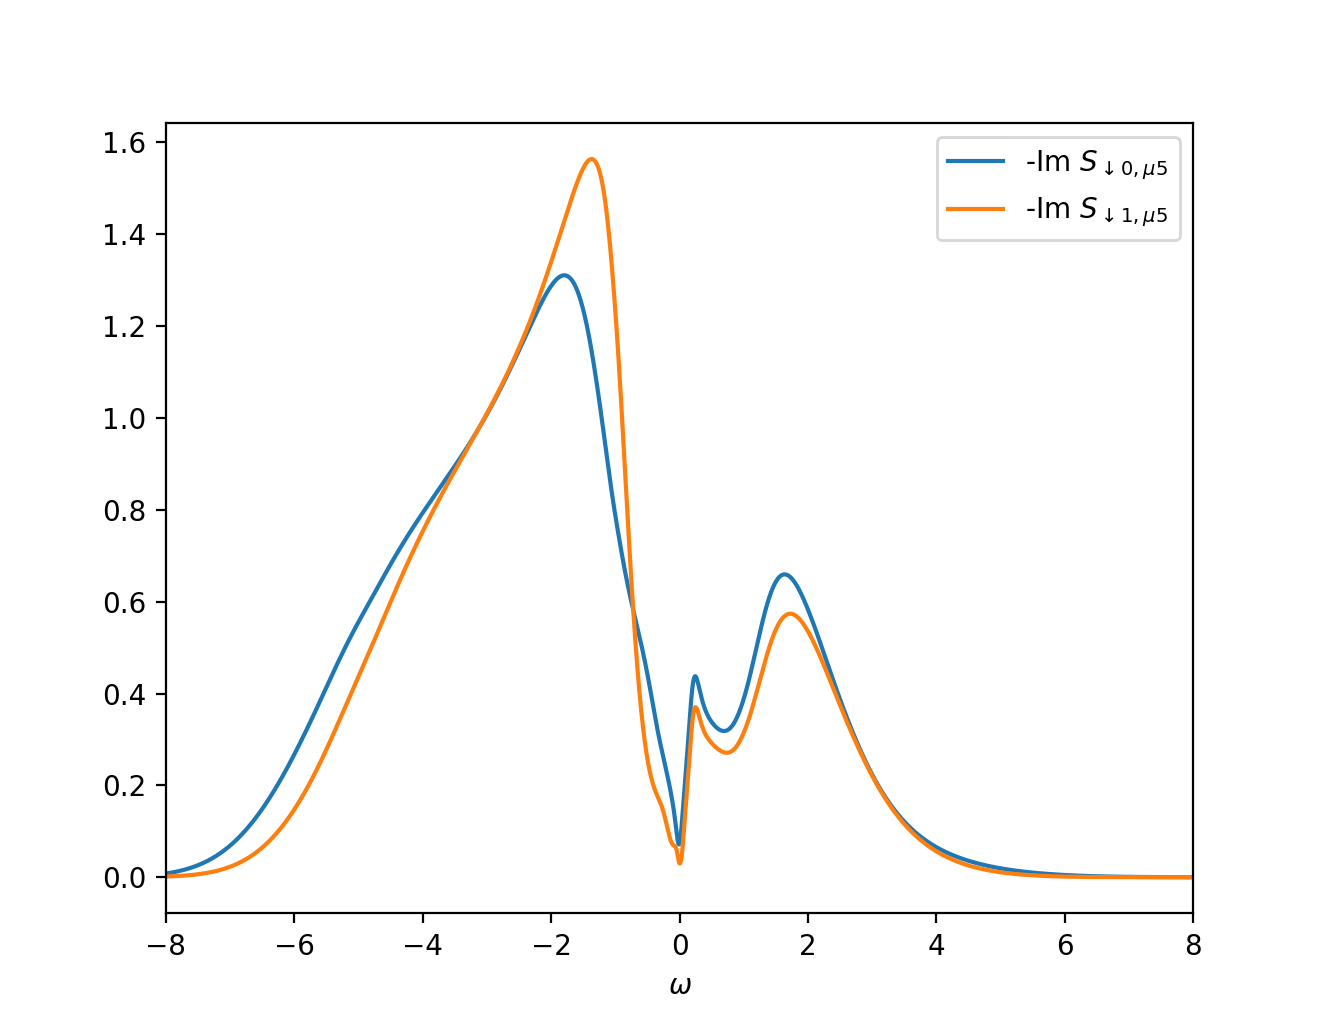

<IPython.core.display.Javascript object>


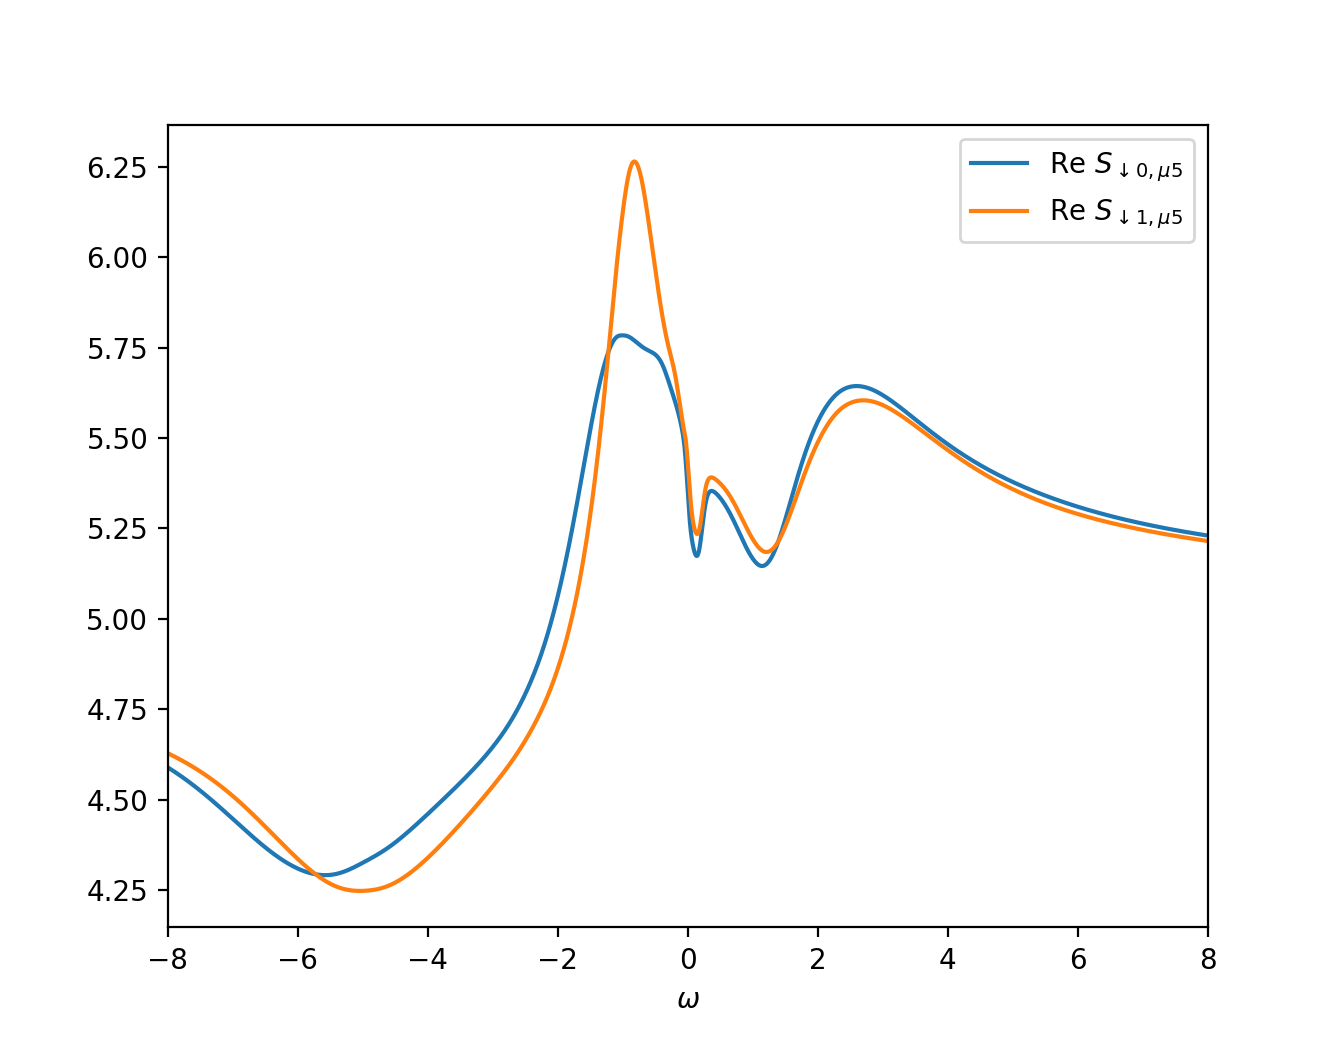

Text(0,0.5,'')

In [16]:
plt.figure(5)
oplot(-S_mu5_down_0.imag,label="-Im $S_{\downarrow 0, \mu5}$")
oplot(-S_mu5_down_1.imag,label="-Im $S_{\downarrow 1, \mu5}$")
plt.xlim([-8,8])
plt.ylabel('')
plt.figure(6)
oplot(S_mu5_down_0.real, label="Re $S_{\downarrow 0, \mu5}$")
oplot(S_mu5_down_1.real, label="Re $S_{\downarrow 1, \mu5}$")
plt.xlim([-8,8])
plt.ylabel('')

We can see that the results are the most stable between $\mu=5$ and $\mu=7$.

In [17]:
os.chdir("..")
su.rmtree(output_dir)